In [23]:
# Importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

# Importando biblioteca para plotagem em 3D
from matplotlib import cm

# Usando a função mágica:
%matplotlib inline

In [24]:
# Definindo a quantidade de amostras:
M = 1000

# Definindo o valor dos pesos: 
a0 = 1.4
a1 = 3.0

# Definindo a função de features:
x = np.random.uniform(0.0, 10.0, M)

# Definindo a função de targets:
y = a0 * x ** a1

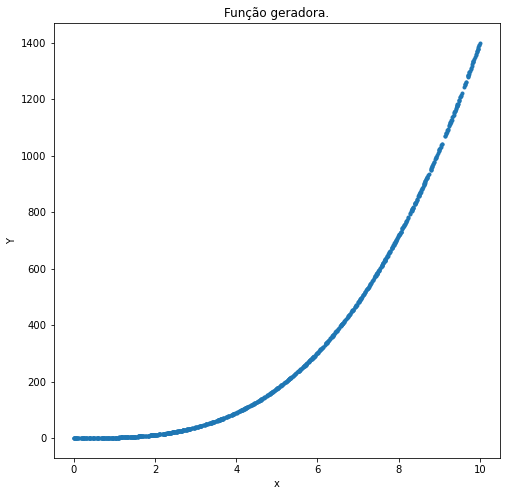

In [25]:
# Plotando o gráfico:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('Função geradora.')
plt.show()

In [31]:
# Plotando a superfície de erro:

# Definindo o número de iterações:
N = 500

# Criando os vetores para armazenar o histórico de pesos:
a0 = np.linspace(-100.0, 100.0, N)
a1 = np.linspace(-100.0, 100.0, N)

# Crinado a malha:
A0, A1 = np.meshgrid(a0, a1)

# Criando a matriz para armazenamento dos valores de erro:
J = np.zeros((N, N))

# Loop
for iter1 in range(0, N):
    for iter2 in range(0, N):
        
        y_hat = A0[iter1][iter2] + A1[iter1][iter2] * x
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

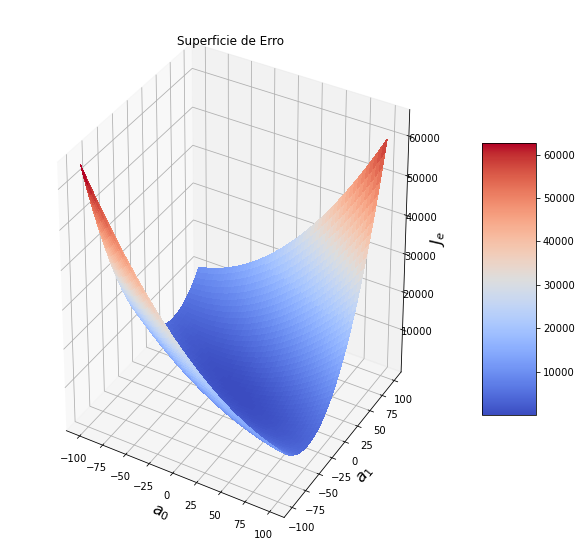

In [32]:
# Plota o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [28]:
# Linearizando a função:
x = np.log(x)
y = np.log(y)

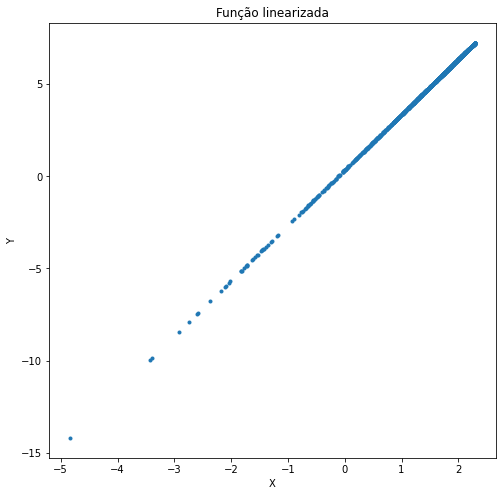

In [11]:
# Plotando a função geradora:
fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Função linearizada')
plt.show()

In [14]:
# Concatenção das features:
X = np.c_[np.ones((M, 1)), x]

# Aplicação da formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = X.dot(a_opt)
j_opt = (1.0/M)*np.sum(np.power((y - y_hat), 2))

In [16]:
# Imprimindo os pesos ótimos encontrados pela formula fechada:
print('O valor de a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0]))
print('O valor de a2 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1]))

O valor de a0 ótimo encontrado pela formula fechada é: 0.33647223662121206
O valor de a2 ótimo encontrado pela formula fechada é: 3.0000000000000027
